# Using kernel principal component analysis for nonlinear mappings

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np


from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import exp
else:
    from scipy import exp

In [ ]:
def rbf_kernel_pca(X, gamma, n_components):
  sq_dists = pdist(X, 'sqeuclidean')

  mat_sq_dists = squareform(sq_dists)

  K = exp(-gamma * mat_sq_dists)


  N = K.shape[0]
  one_n = np.ones((N, N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
  X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])

  return X_pc

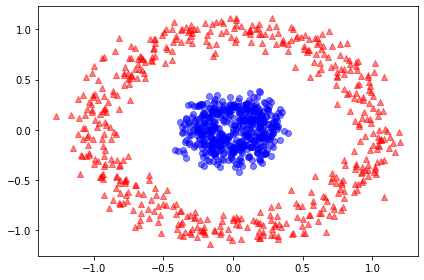

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.show()

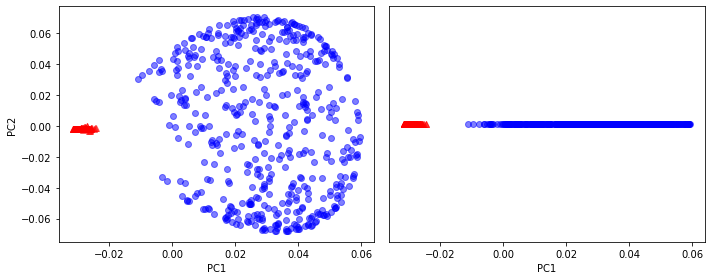

In [ ]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)),
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)),
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

#Projecting new data points

In [20]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    alphas = np.column_stack([eigvecs[:, i]
                              for i in range(n_components)])
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas

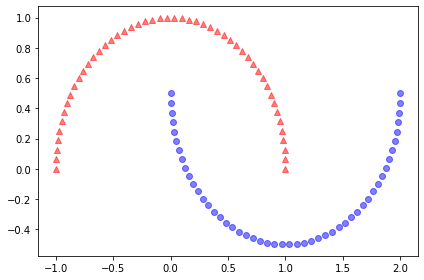

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  if __name__ == '__main__':


In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=2)

In [42]:
x_new = X[25]
x_proj = alphas[25] # X_proj
x_new

array([1.8713187 , 0.00928245])

In [43]:
def project_x(x_new, X, gamma, alphas, lambdas):
   pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
   k = np.exp(-gamma * pair_dist)
   return k.dot(alphas / lambdas)

In [44]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([ 0.07877284, -0.12858888])

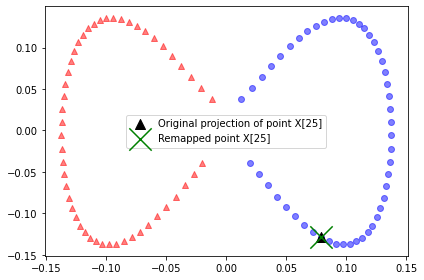

In [54]:
plt.scatter(alphas[y == 0, 0], alphas[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], alphas[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj[0],x_proj[1] , color='black',
            label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj[0], x_reproj[1], color='green',
            label='Remapped point X[25]', marker='x', s=500)

plt.legend(scatterpoints=1)

plt.tight_layout()
# plt.savefig('images/05_18.png', dpi=300)
plt.show()

#Kernel principal component analysis in scikit-learn

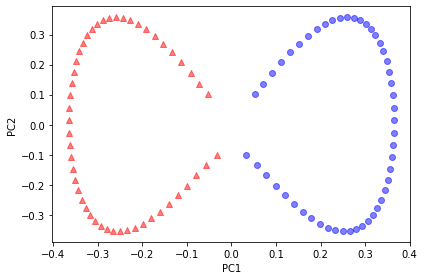

In [24]:
from sklearn.decomposition import KernelPCA


scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('images/05_19.png', dpi=300)
plt.show()


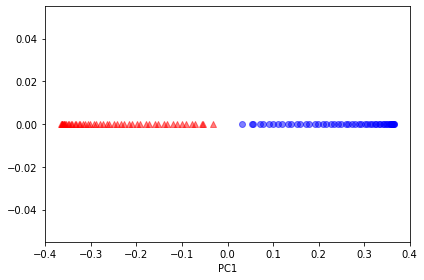

In [49]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0],np.zeros((50)),
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.tight_layout()
plt.show()